In [1]:
import numpy as np
import random as rd
import array
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as sts
from scipy.stats import norm
from scipy import stats

In [2]:
np.random.seed(42)

1. Сравнить среднюю прибыль при различном количистве кг купленных плавников с учётом того, что спрос в среднем составляет 60 кг ежедневно с дисперсией 10 кг.

2. Для расчёты прибыли необходимо расчитать количество проданных деликатесны блюд(кг) и количество проданных плавников(кг) со скидкой. Для этого предположим 100 различных сценариев, в каждом из которых мы покупаем 1, 2, 3, ...100 кг плавников.

In [3]:
pos_bht=np.arange(1,101)#сгенерируем от 1 до 100 возможных покупопок плавников (1 кг, 2 кг и т.д. до 100кг)
sold_dish=[]#определим количество кг проданных деликатесных блюд  
for bht in pos_bht:
    demand=np.random.normal(60, 10, 1000).round()#генерируем различные варианты спроса из нормального рапределения
    for dem in demand:
        if bht>=dem:
            sold_dish=np.append(sold_dish,dem)#если мы купили плавников больше, чем выпал спрос, то кол-во проданных деликатесных блюд равно выпавшему спросу
        else:
                sold_dish=np.append(sold_dish,bht)#если спрос оказался больше, чем кол-во купленных кг плавников, то количество проданных деликатесных блюд равно количеству купленных плавников  

In [4]:
pos_bht=np.arange(1,101)
sold_sale=[]#сгенерируем количество проданных кг плавников со скидкой  
for bht in pos_bht:
    for dem in demand:
        demand=np.random.normal(60, 10, 1000).round()
        if bht>dem:
            sold_sale=np.append(sold_sale,(bht-dem))#если мы купили больше, чем выпал спрос, то со скидкой мы продадим разницу, т.е. bht-dem
        else:
                sold_sale=np.append(sold_sale,0)# если мы купили меньше, чем выпал спрос, то у нас ничего не останется для продажи со скидкой
sold_sale.size
sold_all=np.stack((sold_dish,sold_sale), axis=True)#получим вектор, где первый подэлемент элемента-количество кг проданных деликатесных блюд, а второй количесво проданных кг плавников со скидкой   
profit=[]# сгенерируем вектор возможных прибылей, для этого будем подставлять соответсвующией элементы из ветора sold_all в функцию прибыли 
for bht in pos_bht:
    for i in range(100000):
        if i<bht*1000<=i+1000:#задаём условие, которое позволяет подставлять возможные выпавшие уровни спроса для одного и того же числа купенных плавников. Т.е. купили 1 кг, фиксируем его и подставляем все возможные уровни спроса(1000) из нормального рапределения
            profit=np.append(profit, sold_all[i][0]*12+sold_all[i][1]*6-bht*7.5)

In [5]:
mean_profits=[]#посчитаем вектор средних прибылей для случаев, когда мы покупаем 1, 2 ...100 кг плавников. Т.е 1-ый элемент этого вектора- средняя прибыль,для случая когда мы покупаем 1 кг, 2-ой, когда 2 кг и т.д.
for i in range(100):
    mean_profits=np.append(mean_profits, np.mean(profit[i*1000:(i+1)*1000]))
max_mean_profit=np.max(mean_profits)#находим максимальную среднюю прибыль
print(max_mean_profit,"-наибольшая средняя прибыль из возможных")
print(np.argmax(mean_profits),"-количество плавников, которое нужно покупать, чтобы иметь максмальную прибыль")

255.726 -наибольшая средняя прибыль из возможных
72 -количество плавников, которое нужно покупать, чтобы иметь максмальную прибыль


Text(0, 0.5, 'Средняя прибыль')

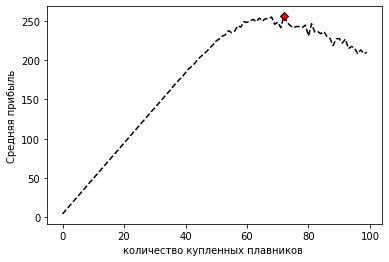

In [6]:
markers_on = [np.argmax(mean_profits)]
plt.plot(mean_profits, 'k--', markevery=markers_on, marker='D', markerfacecolor='red')
plt.xlabel('количество купленных плавников ')
plt.ylabel('Средняя прибыль')

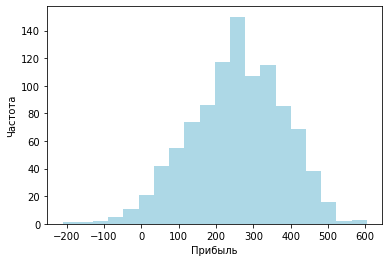

In [7]:
opt_profit=profit[np.argmax(mean_profits)*1000:(np.argmax(mean_profits)+1)*1000]
plt.hist(opt_profit,bins=20, color="lightblue")
plt.xlabel('Прибыль')
plt.ylabel('Частота')
opt_profit_mode=stats.mode(opt_profit)
opt_profit_median=np.median(opt_profit)
opt_profit_aver=np.mean(opt_profit)
opt_profit_prec_10=np.percentile(opt_profit, 10)
opt_profit_prec_90=np.percentile(opt_profit, 90)

3.

In [8]:
print(opt_profit_mode,"---МОДА")
print(opt_profit_median, "---МЕДИАНА")
print(opt_profit_aver, "---СРЕДНЯЯ")
print(opt_profit_prec_10, "---10-ЫЙ ПРОЦЕНТИЛЬ")
print(opt_profit_prec_90, "---90-ЫЙ ПРОЦЕНТИЛЬ")

ModeResult(mode=array([268.5]), count=array([32])) ---МОДА
259.5 ---МЕДИАНА
255.726 ---СРЕДНЯЯ
88.5 ---10-ЫЙ ПРОЦЕНТИЛЬ
412.5 ---90-ЫЙ ПРОЦЕНТИЛЬ
